# WeatherPy
----


In [3]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#mini_cities = cities[:50]
#mini_cities

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
name = []
lat = []
long = []
max_temp = []
humid = []
clouds = []
winds = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print("Beginning Data Retrieval\n")

for city in cities:
    print("Processing Record " + str(cities.index(city)) + " | " + city)
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        time.sleep(1.01)
        
    except(KeyError):
        print("City not found!")
        pass
    
    
#response

Beginning Data Retrieval

Processing Record 0 | te anau
Processing Record 1 | cape town
Processing Record 2 | narsaq
Processing Record 3 | hobart
Processing Record 4 | petropavlovsk-kamchatskiy
Processing Record 5 | pankrushikha
Processing Record 6 | kabinda
Processing Record 7 | punta arenas
Processing Record 8 | vaini
Processing Record 9 | nemuro
Processing Record 10 | ushtobe
Processing Record 11 | busselton
Processing Record 12 | chapais
Processing Record 13 | hermanus
Processing Record 14 | sentyabrskiy
City not found!
Processing Record 15 | skalistyy
City not found!
Processing Record 16 | mangan
Processing Record 17 | mataura
Processing Record 18 | new norfolk
Processing Record 19 | tasiilaq
Processing Record 20 | thompson
Processing Record 21 | victoria
Processing Record 22 | amderma
City not found!
Processing Record 23 | yellowknife
Processing Record 24 | butaritari
Processing Record 25 | longyearbyen
Processing Record 26 | hilo
Processing Record 27 | ferme-neuve
Processing Rec

Processing Record 239 | bolshegrivskoye
City not found!
Processing Record 240 | chuy
Processing Record 241 | vanimo
Processing Record 242 | provost
Processing Record 243 | shelburne
Processing Record 244 | namatanai
Processing Record 245 | kenai
Processing Record 246 | souillac
Processing Record 247 | jinji
Processing Record 248 | tumannyy
City not found!
Processing Record 249 | sayanogorsk
Processing Record 250 | nanortalik
Processing Record 251 | muisne
Processing Record 252 | ust-kuyga
Processing Record 253 | husavik
Processing Record 254 | jaru
Processing Record 255 | assiniboia
Processing Record 256 | grindavik
Processing Record 257 | mamontovo
Processing Record 258 | mangrol
Processing Record 259 | korla
Processing Record 260 | tidore
City not found!
Processing Record 261 | meyungs
City not found!
Processing Record 262 | yomitan
City not found!
Processing Record 263 | mamedkala
Processing Record 264 | jiaonan
Processing Record 265 | bur gabo
City not found!
Processing Record 266 

Processing Record 475 | kargasok
Processing Record 476 | alice springs
Processing Record 477 | iqaluit
Processing Record 478 | manokwari
Processing Record 479 | kanniyakumari
Processing Record 480 | puerto asis
Processing Record 481 | hualmay
Processing Record 482 | luebo
Processing Record 483 | grand gaube
Processing Record 484 | hovd
Processing Record 485 | roald
Processing Record 486 | hirara
Processing Record 487 | mao
Processing Record 488 | valer
Processing Record 489 | irbeyskoye
Processing Record 490 | guanica
Processing Record 491 | cooma
Processing Record 492 | viedma
Processing Record 493 | lagoa
Processing Record 494 | tura
Processing Record 495 | manaure
Processing Record 496 | sinkat
City not found!
Processing Record 497 | chabahar
Processing Record 498 | bontang
Processing Record 499 | rocha
Processing Record 500 | half moon bay
Processing Record 501 | kidal
Processing Record 502 | duekoue
Processing Record 503 | katherine
Processing Record 504 | longonjo
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather_dict = {
    "City": name,
    "Lat": lat,
    "Lng": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv(output_data_file)    
#weather_data.iloc[1,4] = 200
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.4167,167.7167,69.10,54,100,5.91,NZ,1612754873
1,Cape Town,-33.9258,18.4232,66.99,72,0,14.97,ZA,1612754841
2,Narsaq,60.9167,-46.0500,39.20,28,20,39.12,GL,1612754878
3,Hobart,-42.8794,147.3294,66.20,45,40,18.41,AU,1612754747
4,Petropavlovsk-Kamchatskiy,53.0452,158.6483,24.80,80,90,8.95,RU,1612754863


In [8]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,21.214749,16.591725,48.242004,73.261733,52.705776,8.562347,1.612755e+09
std,32.763562,92.016158,31.820634,19.229698,39.862944,6.317231,2.807610e+02
min,-54.800000,-179.166700,-35.640000,12.000000,0.000000,0.290000,1.612755e+09
25%,-5.312225,-67.397300,26.600000,63.250000,9.000000,3.950000,1.612755e+09
50%,26.910700,20.998050,57.945000,78.000000,53.000000,6.910000,1.612755e+09
75%,47.657875,100.349575,73.915000,87.000000,93.750000,11.500000,1.612756e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,39.120000,1.612756e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
damp_places = weather_data.index[weather_data['Humidity'] > 100].tolist()
damp_places

[]

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data.drop(weather_data.index[damp_places], inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.4167,167.7167,69.10,54,100,5.91,NZ,1612754873
1,Cape Town,-33.9258,18.4232,66.99,72,0,14.97,ZA,1612754841
2,Narsaq,60.9167,-46.0500,39.20,28,20,39.12,GL,1612754878
3,Hobart,-42.8794,147.3294,66.20,45,40,18.41,AU,1612754747
4,Petropavlovsk-Kamchatskiy,53.0452,158.6483,24.80,80,90,8.95,RU,1612754863


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

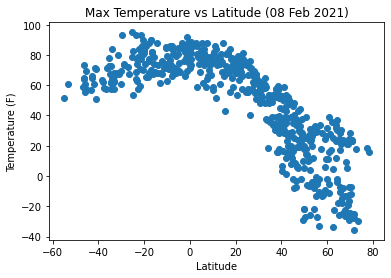

In [11]:
date_utc = time.gmtime(clean_city_data['Date'][0])

plt.scatter(clean_city_data['Lat'],clean_city_data['Max Temp'])

plt.title("Max Temperature vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.savefig("output_data/Temp_Lat")

When max temperature is plotted against latitude, we see the highest temperatures at the equator (latitude 0), and temperatures decreasing as we move north and south from there. Max temperatures are significantly lower in the northern hemisphere, where it's winter, which explains why the plot is not symmetrical. 

## Latitude vs. Humidity Plot

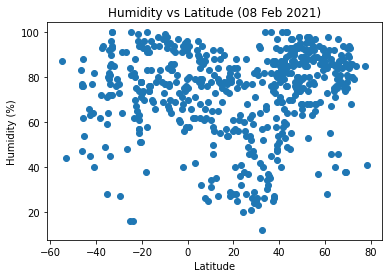

In [12]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])

plt.title("Humidity vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_Lat")

A plot of humidity vs latitude does not reveal such an obvious trend, but it does appear that higher humidities are 
concentrated in the northern hemisphere. However, this may simply be explained by the fact that there is more landmass in the northern hemisphere, and therefore the cities in the sample are more spaced out in the northern hemisphere.

## Latitude vs. Cloudiness Plot

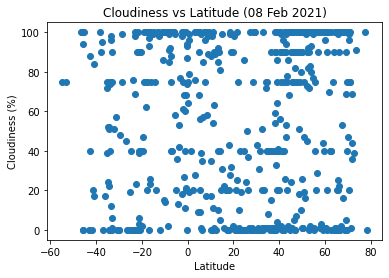

In [14]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])

plt.title("Cloudiness vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Cloud_Lat")

Cloudiness vs Latitude is even more evenly distributed by latitude than humidity, but there are obvious concentrations of data points at specific values of cloudiness. We can infer from this that cloud cover is generally reported in discrete values of 0, 20, 40, 75 or so, 90, or 100%.

## Latitude vs. Wind Speed Plot

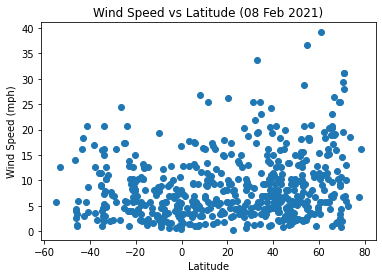

In [15]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])

plt.title("Wind Speed vs Latitude (" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Wind_Lat")

Wind speed vs latitude shows most wind conditions across latitudes are moderate at below 20 mph or so. Extreme wind speeds appear to be more prevalent in the northern hemisphere, with the highest observation of about 40 mph at around 60 deg N latitude. This is likely again due to seasonal variation between hemispheres. However, we should also note here that we have no data points further south than 60 degrees, whereas in the northern hemisphere there are numerous data points north of 60 degrees. Of course this is because the arctic is more populated than the antarctic. But if we are interested in global wind speeds, this random selection of cities is not a good dataset since there are so few cities in the antarctic that could be included in an analysis.

## Linear Regression

In [16]:
lats = clean_city_data['Lat']
nth_lats = clean_city_data.loc[clean_city_data['Lat'] >= 0, :]
n_lats = nth_lats['Lat']

sth_lats = clean_city_data.loc[clean_city_data['Lat'] < 0, :]
s_lats = sth_lats['Lat']

n_max_temps = nth_lats['Max Temp']
s_max_temps = sth_lats['Max Temp']
import scipy.stats as st


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.86.

The linear regression model is y = -1.38x + 91.14.


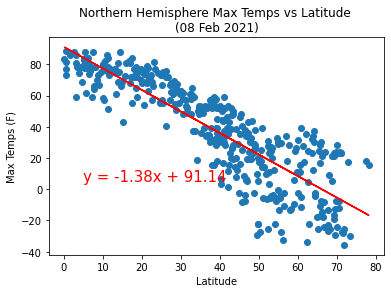

In [18]:
# Calculate the correlation coefficient and linear regression model 

correlation = st.pearsonr(n_lats, n_max_temps)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_max_temps)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_max_temps)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")

plt.title("Northern Hemisphere Max Temps vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Temp_NLat_reg")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.54.

The linear regression model is y = 0.38x + 81.57.


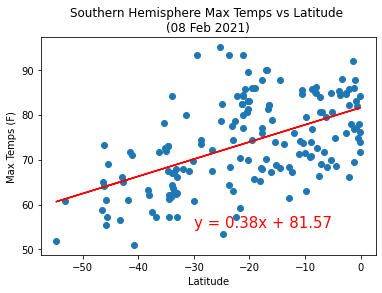

In [19]:
correlation = st.pearsonr(s_lats, s_max_temps)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_max_temps)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_max_temps)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Southern Hemisphere Max Temps vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Max Temps (F)")

plt.savefig("output_data/Temp_SLat_reg")

#### Max Temp vs Latitude by hemisphere analysis/observations
The linear regression model for the northern hemisphere shows a much stronger r-value at -.86 than does that of the southern hemisphere at .54. A couple possible factors come to mind: first, there are more data points in the northern hemisphere, since there is more landmass there, and therefore the list of cities produced a more even geographical spread of cities.  In the southern hemisphere, which has a larger proportion of water, our method of selecting cities would tend to produce locations on the coast, as coordinates in the middle of the ocean are paired with a smaller selection of cities at a greater distance.  Likewise, as previously noted, this sample has no cities south of 60 degrees, whereas there are numerous cities north of 60 degrees.  
Seasonal differences between hemispheres also explain this trend, since there will be more variation in max temperature in the northern hemisphere at this time of year. That accounts for the more dramatic slope of that model, as well as the fact that the most extreme temperature in the northern hemisphere is in the neighborhood of -40, whereas in the southern hemisphere the lowest max temperature is a balmy 50 degrees.

The northern hemisphere model (y = -1.38x + 91.14) predicts a temperature of 91 degrees at the equator, while the southern hemisphere model predicts a max temperature of only 81 degrees at the equator. Due to the more closely grouped datapoints in the northern hemisphere (and consequently higher r-value), that model is more likely to be an accurate predictor of max temperature at the equator. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.29.

The linear regression model is y = 0.29x + 60.57.


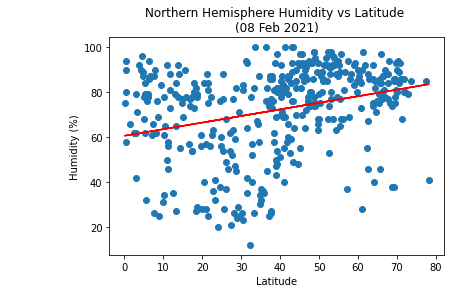

In [20]:
n_hums = nth_lats['Humidity']

correlation = st.pearsonr(n_lats, n_hums)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_hums)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_hums)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Northern Hemisphere Humidity vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_NLat_reg")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.21.

The linear regression model is y = 0.26x + 81.44.


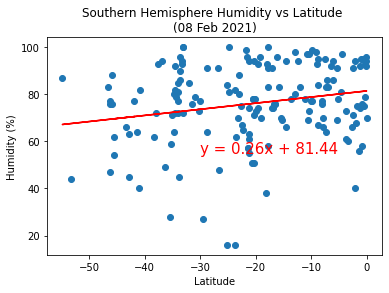

In [21]:
s_hums = sth_lats['Humidity']

correlation = st.pearsonr(s_lats, s_hums)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_hums)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_hums)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

plt.title("Southern Hemisphere Humidity vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("output_data/Hum_SLat_reg")

#### Humidity vs Latitude by hemisphere analysis/observations
With r-values less than .3 in both hemispheres, neither of these datasets shows a linear tendency, and these linear regression models should not be used to predict humidity at a given latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.09.

The linear regression model is y = 0.18x + 43.78.


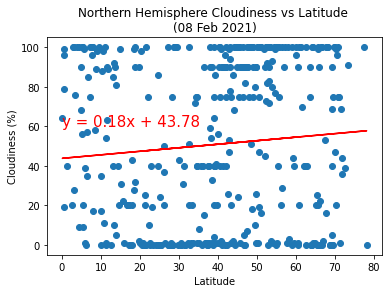

In [25]:
n_clouds = nth_lats['Cloudiness']

correlation = st.pearsonr(n_lats, n_clouds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_clouds)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_clouds)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(0,60),fontsize=15,color="red")

plt.title("Northern Hemisphere Cloudiness vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Clouds_NLat_reg")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.17.

The linear regression model is y = 0.46x + 66.69.


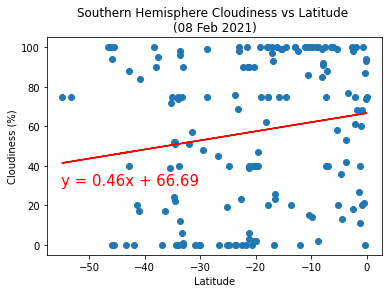

In [24]:
s_clouds = sth_lats['Cloudiness']

correlation = st.pearsonr(s_lats, s_clouds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_clouds)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_clouds)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=15,color="red")

plt.title("Southern Hemisphere Cloudiness vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("output_data/Clouds_SLat_reg")

#### Cloudiness vs Latitude by hemisphere analysis/observations
The linear tendency as measured by r-value in these plots is basically non-existent, at .09 in the northern hemisphere and .17 in the southern. Again the prominent horizontal grouping of cloudiness at round % numbers is extremely noticeable, but says more about how this data is categorized than any notable global trends, at least at this time of year. Likewise the fact that the southern hemisphere has fewer data points makes it hard to make any meaningful distinctions between the hemispheres.  

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.18.

The linear regression model is y = 0.06x + 6.8.


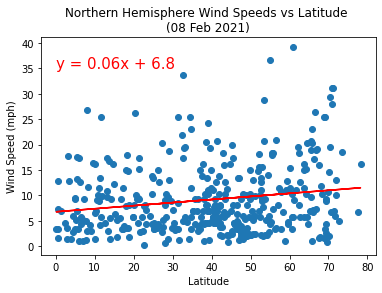

In [26]:
n_winds = nth_lats['Wind Speed']

correlation = st.pearsonr(n_lats, n_winds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lats, n_winds)
regress_values = n_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(n_lats, n_winds)
plt.plot(n_lats,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

plt.title("Northern Hemisphere Wind Speeds vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Winds_NLat_reg")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.21.

The linear regression model is y = -0.07x + 5.65.


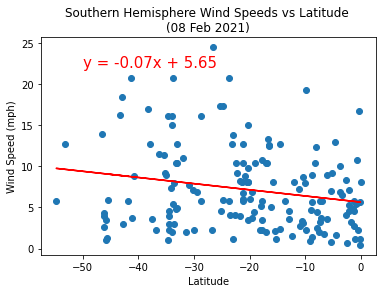

In [28]:
s_winds = sth_lats['Wind Speed']

correlation = st.pearsonr(s_lats, s_winds)
print(f"The r-value is {round(correlation[0],2)}.\n")

(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lats, s_winds)
regress_values = s_lats * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression model is {line_eq}.")
plt.scatter(s_lats, s_winds)
plt.plot(s_lats,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")

plt.title("Southern Hemisphere Wind Speeds vs Latitude \n(" + time.strftime("%d %b %Y", date_utc) +")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("output_data/Winds_SLat_reg")

#### Wind Speed vs Latitude by hemisphere analysis/observations
Plots of wind speeds vs latitude do not display strong linear tendencies, with r-values in the neighborhood of only .2 in both hemispheres. Here, though, the extreme values are explainable by seasonal weather, and properties of the sample of cities. Again we have to note that there are no data points in the southern hemisphere south of 60 degrees, and that it's summer in the southern hemisphere.  So we would expect more mild weather in general, and since the antarctic, which does have high winds and extreme weather condiditions, has far fewer cities that could be included in our dataset than the arctic, we expect to see fewer extreme wind speeds than in the northern hemisphere.